In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import requests

In [2]:
heart_data = pd.read_csv('Desktop/uci_data/heart.csv.csv')

In [3]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data['sex']=heart_data['sex'].replace([0,1],['female','male'])
heart_data['cp']=heart_data['cp'].replace([0,1,2,3],['typical angina', 'atypical angina', 'non-anginal pain', 'no pain'])
# heart_data['target']=heart_data['target'].replace([0,1],['not at risk', 'at risk'])
heart_data['fbs']=heart_data['fbs'].replace([0,1],['normal','fast blood'])
heart_data['slope']=heart_data['slope'].replace([0,1,2], ['upsloping', 'flat', 'downsloping'])
heart_data['restecg']=heart_data['restecg'].replace([0,1],['False','True'])
heart_data['exang']=heart_data['exang'].replace([0,1],['False','True'])
heart_data['thal']=heart_data['thal'].replace([1,2,3], ['normal', 'fixed detect','reversable detect'])

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,no pain,145,233,fast blood,False,150,False,2.3,upsloping,0,normal,1
1,37,male,non-anginal pain,130,250,normal,True,187,False,3.5,upsloping,0,fixed detect,1
2,41,female,atypical angina,130,204,normal,False,172,False,1.4,downsloping,0,fixed detect,1
3,56,male,atypical angina,120,236,normal,True,178,False,0.8,downsloping,0,fixed detect,1
4,57,female,typical angina,120,354,normal,True,163,True,0.6,downsloping,0,fixed detect,1


In [6]:
heart_data['typical angina']=heart_data['cp'].replace(['typical angina', 'atypical angina', 'non-anginal pain', 'no pain'],[1,0,0,0])
heart_data['atypical angina']=heart_data['cp'].replace(['typical angina', 'atypical angina', 'non-anginal pain', 'no pain'],[0,1,0,0])
heart_data['non-anginal']=heart_data['cp'].replace(['typical angina', 'atypical angina', 'non-anginal pain', 'no pain'],[0,0,1,0])
heart_data['no pain']=heart_data['cp'].replace(['typical angina', 'atypical angina', 'non-anginal pain', 'no pain'],[0,0,0,1])

In [7]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,typical angina,atypical angina,non-anginal,no pain
0,63,male,no pain,145,233,fast blood,False,150,False,2.3,upsloping,0,normal,1,0,0,0,1
1,37,male,non-anginal pain,130,250,normal,True,187,False,3.5,upsloping,0,fixed detect,1,0,0,1,0
2,41,female,atypical angina,130,204,normal,False,172,False,1.4,downsloping,0,fixed detect,1,0,1,0,0
3,56,male,atypical angina,120,236,normal,True,178,False,0.8,downsloping,0,fixed detect,1,0,1,0,0
4,57,female,typical angina,120,354,normal,True,163,True,0.6,downsloping,0,fixed detect,1,1,0,0,0


In [8]:
new=heart_data[['sex','typical angina','atypical angina','non-anginal','no pain','target']]

In [9]:
men_cp=new.loc[new['sex'] == 'male'].set_index('sex')
women_cp=new.loc[new['sex'] == 'female'].set_index('sex')

In [10]:
print(men_cp.head())
print(women_cp.head())

      typical angina  atypical angina  non-anginal  no pain  target
sex                                                                
male               0                0            0        1       1
male               0                0            1        0       1
male               0                1            0        0       1
male               1                0            0        0       1
male               0                1            0        0       1
        typical angina  atypical angina  non-anginal  no pain  target
sex                                                                  
female               0                1            0        0       1
female               1                0            0        0       1
female               0                1            0        0       1
female               0                0            1        0       1
female               0                0            0        1       1


In [11]:
A = np.array(men_cp[['typical angina','atypical angina','non-anginal','no pain']])

In [12]:
B = np.array(men_cp['target'])

In [13]:
B = B.reshape(207,1)

In [14]:
B.shape

(207, 1)

In [15]:
A.shape

(207, 4)

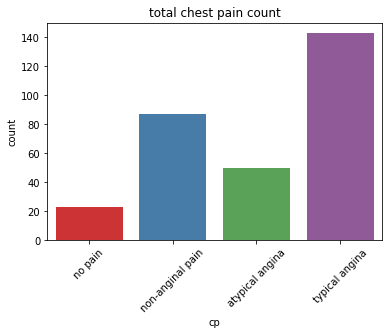

In [36]:
sns.countplot(heart_data['cp'], palette='Set1')
plt.title('total chest pain count')
plt.xticks(rotation=45)
plt.show()

In [37]:
men_cp.sum()

typical angina     104
atypical angina     32
non-anginal         52
no pain             19
target              93
dtype: int64

In [38]:
women_cp.sum()

typical angina     39
atypical angina    18
non-anginal        35
no pain             4
target             72
dtype: int64